Let's start by downloading our example data, a .zip of 2,000 JPG pictures of cats and dogs, and extracting it locally in `/tmp`.

In [1]:
import os

In [2]:
# Review how to use
os.path.expanduser("~/downloads/")

'/home/phunc20/downloads/'

In [5]:
!ls ../../..

02_convolutional-neural-networks-tensorflow	    README.md
04_tensorflow-sequences-time-series-and-prediction  rps-test-set.zip
corbeille					    rps-validation.zip
datasets					    rps.zip
introduction-tensorflow				    weights
progress.md


In [6]:
datasets_path = os.path.expanduser("../../../datasets")
zip_path = "/tmp/cats_and_dogs_filtered.zip"
unzip_path = os.path.join(datasets_path, "cats_and_dogs_filtered")

In [7]:
os.makedirs(datasets_path, exist_ok=True)

In [8]:
if os.path.exists(zip_path) or os.path.exists(unzip_path):
    pass
else:
    !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O $zip_path    

In [9]:
import zipfile

In [10]:
if not os.path.exists(unzip_path):
    print(f"{zip_path} hasn't been unzipped.\nUnzip it now to {datasets_path}")
    zip_ref = zipfile.ZipFile(zip_path, 'r')
    zip_ref.extractall(datasets_path)
    zip_ref.close()

In [11]:
ls $unzip_path

train/  validation/  vectorize.py


In [12]:
!tree -d $unzip_path

../../../datasets/cats_and_dogs_filtered
├── train
│   ├── cats
│   └── dogs
└── validation
    ├── cats
    └── dogs

6 directories


In [13]:
!tree --filelimit 5 $unzip_path

../../../datasets/cats_and_dogs_filtered
├── train
│   ├── cats [1002 entries exceeds filelimit, not opening dir]
│   └── dogs [1000 entries exceeds filelimit, not opening dir]
├── validation
│   ├── cats [500 entries exceeds filelimit, not opening dir]
│   └── dogs [500 entries exceeds filelimit, not opening dir]
└── vectorize.py

6 directories, 1 file


In [15]:
base_dir = unzip_path

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [16]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print()
print(train_dog_fnames[:10])

['cat.767.jpg', 'cat.507.jpg', 'cat.26.jpg', 'cat.712.jpg', 'cat.313.jpg', 'cat.167.jpg', 'cat.355.jpg', 'cat.372.jpg', 'cat.2.jpg', 'cat.248.jpg']

['dog.8.jpg', 'dog.402.jpg', 'dog.919.jpg', 'dog.591.jpg', 'dog.263.jpg', 'dog.280.jpg', 'dog.660.jpg', 'dog.357.jpg', 'dog.147.jpg', 'dog.278.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [19]:
print('(# training cat images) =', len(os.listdir(train_cats_dir)))
print('(# training dog images) =', len(os.listdir(train_dogs_dir)))

print('(# validation cat images) =', len(os.listdir(validation_cats_dir)))
print('(# validation dog images) =', len(os.listdir(validation_dogs_dir)))

(# training cat images) = 1000
(# training dog images) = 1000
(# validation cat images) = 500
(# validation dog images) = 500


For both cats and dogs, we have 1,000 training images and 500 validation images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

pic_index = 32


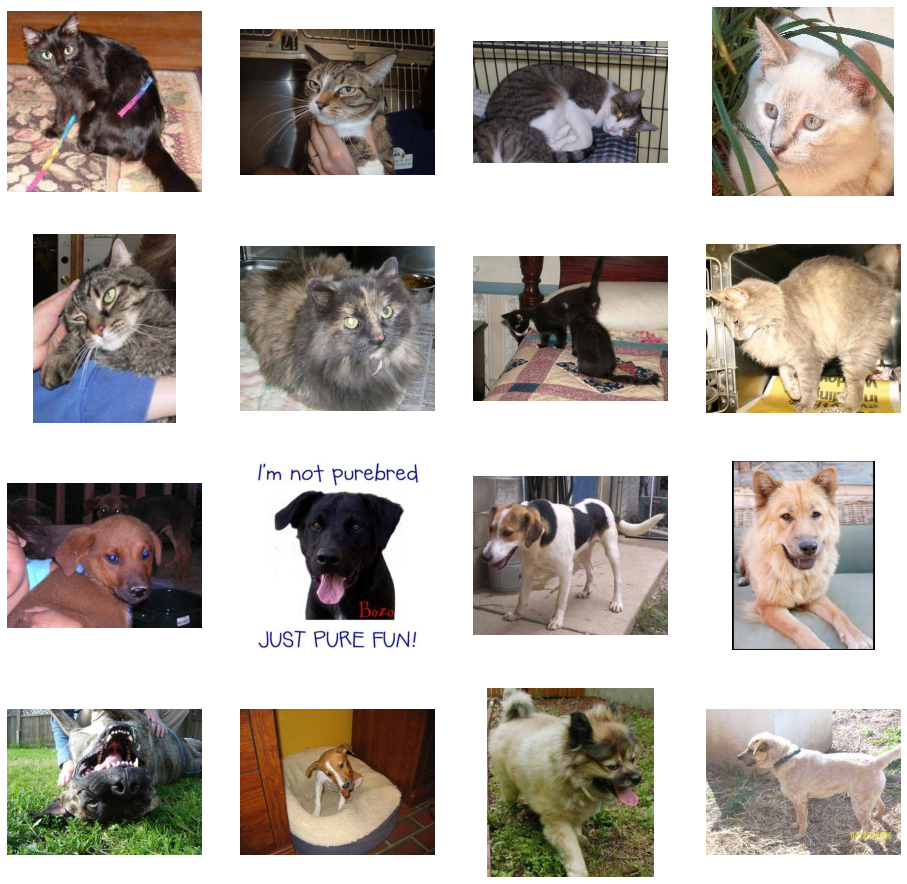

In [29]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()  # gcf() for "Get Current Figure"
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
print("pic_index =", pic_index)

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8: pic_index] 
               ]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8: pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis("Off")

    img = mpimg.imread(img_path)
    plt.imshow(img)

In [27]:
type(img), img.dtype, img.shape

(numpy.ndarray, dtype('uint8'), (500, 374, 3))

It's <b>NOT</b> suitable to put <code><b>plt.imshow(img);</b></code> <b>outside</b> the for loop. As you can in the following cell.

pic_index = 48


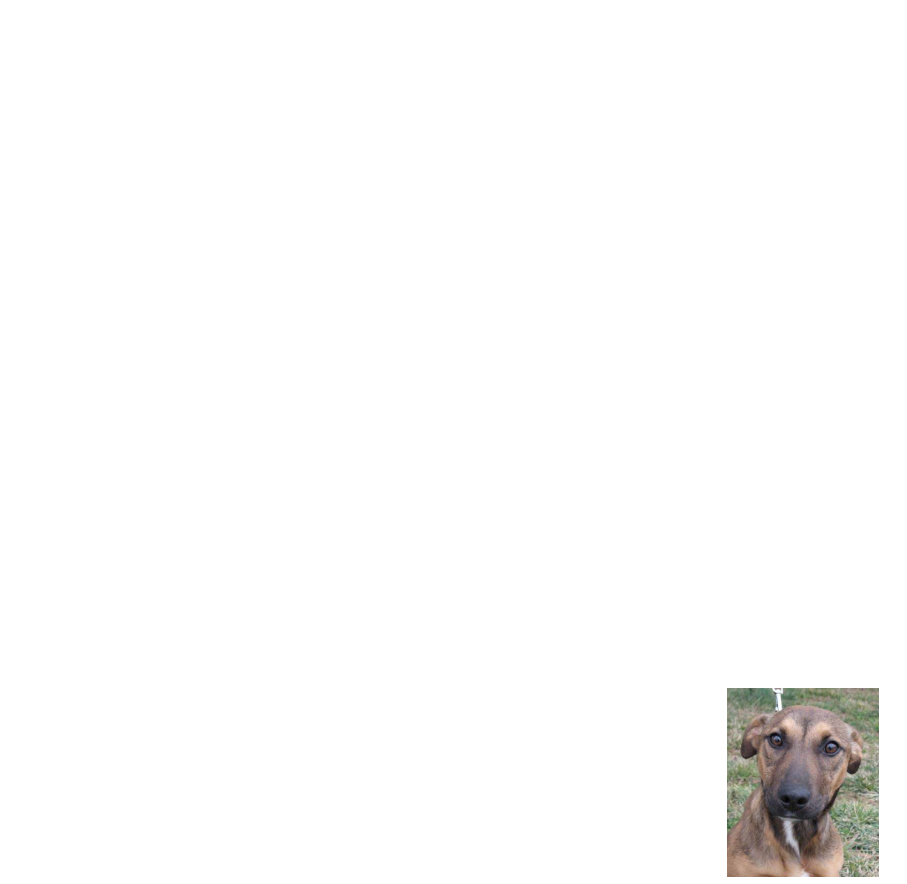

In [31]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()  # gcf() for "Get Current Figure"
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
print("pic_index =", pic_index)

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8: pic_index] 
               ]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8: pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis("Off")

    img = mpimg.imread(img_path)

plt.imshow(img);

<b>Note.</b> The images come in all shapes and sizes.

In [16]:
!identify ~/datasets/cats_and_dogs_filtered/train/cats/cat.{0..5}.jpg | awk '{ print $1 " " $3}'

/home/leif/datasets/cats_and_dogs_filtered/train/cats/cat.0.jpg 500x374
/home/leif/datasets/cats_and_dogs_filtered/train/cats/cat.1.jpg 300x280
/home/leif/datasets/cats_and_dogs_filtered/train/cats/cat.2.jpg 312x396
/home/leif/datasets/cats_and_dogs_filtered/train/cats/cat.3.jpg 500x414
/home/leif/datasets/cats_and_dogs_filtered/train/cats/cat.4.jpg 499x375
/home/leif/datasets/cats_and_dogs_filtered/train/cats/cat.5.jpg 175x144


In [17]:
!identify ~/datasets/cats_and_dogs_filtered/train/dogs/dog.{0..5}.jpg | awk '{ print $1 " " $3}'

/home/leif/datasets/cats_and_dogs_filtered/train/dogs/dog.0.jpg 499x375
/home/leif/datasets/cats_and_dogs_filtered/train/dogs/dog.1.jpg 327x499
/home/leif/datasets/cats_and_dogs_filtered/train/dogs/dog.2.jpg 187x199
/home/leif/datasets/cats_and_dogs_filtered/train/dogs/dog.3.jpg 499x375
/home/leif/datasets/cats_and_dogs_filtered/train/dogs/dog.4.jpg 300x287
/home/leif/datasets/cats_and_dogs_filtered/train/dogs/dog.5.jpg 499x376


## Building a Small Model from Scratch to Get to ~72% Accuracy

In the previous section you saw that the images were in a variety of shapes and sizes. In order to train a neural network to handle them you'll need them to be in a uniform size. We've chosen 150x150 for this, and you'll see the code that preprocesses the images to that shape shortly. 

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2), 
    keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    keras.layers.Dense(1, activation='sigmoid')  
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

The convolutional layers reduce the size of the feature maps a little bit <b>due to <code>padding=3</code></b>, and each pooling layer <b>halves</b> the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit()`, `evaluate_generator()`, and `predict_generator()`.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen  = ImageDataGenerator(rescale = 1/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [97]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

### Training

In [98]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_steps=50,
    verbose=2,
)

Epoch 1/15
100/100 - 19s - loss: 0.8694 - accuracy: 0.5855 - val_loss: 0.6469 - val_accuracy: 0.5660
Epoch 2/15
100/100 - 21s - loss: 0.6271 - accuracy: 0.6560 - val_loss: 0.6093 - val_accuracy: 0.6710
Epoch 3/15
100/100 - 22s - loss: 0.5353 - accuracy: 0.7395 - val_loss: 0.5757 - val_accuracy: 0.7140
Epoch 4/15
100/100 - 22s - loss: 0.4426 - accuracy: 0.7935 - val_loss: 0.6344 - val_accuracy: 0.7020
Epoch 5/15
100/100 - 21s - loss: 0.3818 - accuracy: 0.8310 - val_loss: 0.6961 - val_accuracy: 0.6630
Epoch 6/15
100/100 - 22s - loss: 0.3003 - accuracy: 0.8590 - val_loss: 0.7327 - val_accuracy: 0.6950
Epoch 7/15
100/100 - 22s - loss: 0.2135 - accuracy: 0.9150 - val_loss: 0.8532 - val_accuracy: 0.6750
Epoch 8/15
100/100 - 22s - loss: 0.1456 - accuracy: 0.9425 - val_loss: 1.0864 - val_accuracy: 0.7020
Epoch 9/15
100/100 - 22s - loss: 0.1008 - accuracy: 0.9680 - val_loss: 1.4913 - val_accuracy: 0.6660
Epoch 10/15
100/100 - 23s - loss: 0.0792 - accuracy: 0.9795 - val_loss: 1.7486 - val_accura

In [100]:
model.save("cats-dogs-1st")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cats-dogs-1st/assets


In [103]:
ls -tl cats-dogs-1st/

total 152
-rw-r--r-- 1 leif leif 146425 Jul  1 15:52 saved_model.pb
drwxr-xr-x 2 leif leif   4096 Jul  1 15:52 assets/
drwxr-xr-x 2 leif leif   4096 Jul  1 15:52 variables/


In [99]:
help(model.save)

Help on method save in module tensorflow.python.keras.engine.network:

save(filepath, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Saves the model to Tensorflow SavedModel or a single HDF5 file.
    
    The savefile includes:
        - The model architecture, allowing to re-instantiate the model.
        - The model weights.
        - The state of the optimizer, allowing to resume training
            exactly where you left off.
    
    This allows you to save the entirety of the state of a model
    in a single file.
    
    Saved models can be reinstantiated via `keras.models.load_model`.
    The model returned by `load_model` is a compiled model ready to be used
    (unless the saved model was never compiled in the first place).
    
    Models built with the Sequential and Functional API can be saved to both the
    HDF5 and SavedModel formats. Subclassed model

In [104]:
model.save("cats-dogs-1st.h5")

In [105]:
ls -tl | head -5

total 105148
-rw-r--r-- 1 leif leif 76004096 Jul  1 15:54 cats-dogs-1st.h5
-rw-r--r-- 1 leif leif  1199638 Jul  1 15:53 04_ours.ipynb
drwxr-xr-x 4 leif leif     4096 Jul  1 15:52 cats-dogs-1st/
-rw-r--r-- 1 leif leif     5072 Jul  1 15:47 trash.py


### Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [27]:
import os
if os.path.exists("cats-dogs-1st.h5"):
    model = keras.models.load_model("cats-dogs-1st.h5")

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/home/leif/.virtualenvs/py3.6/lib64/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


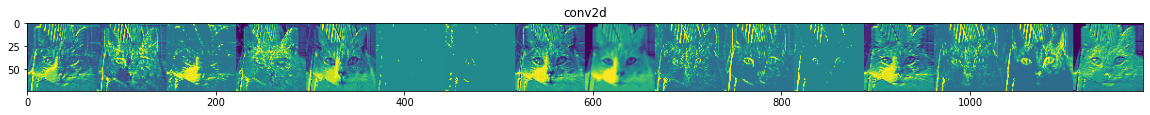

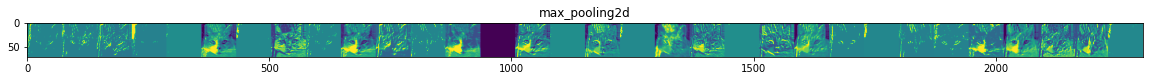

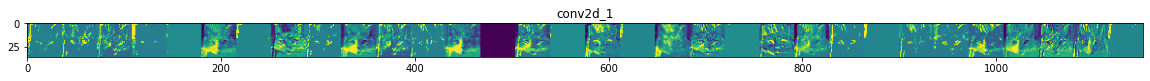

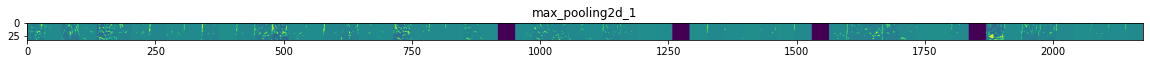

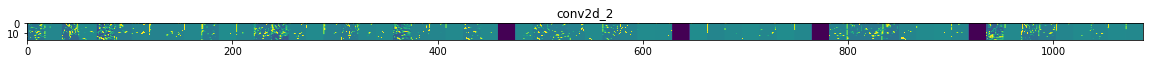

In [28]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [25]:
[layer.name for layer in model.layers]

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1']

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

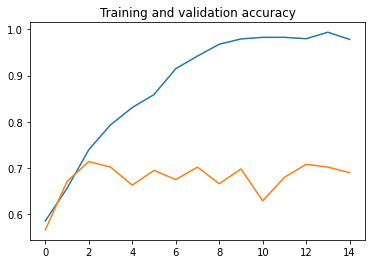

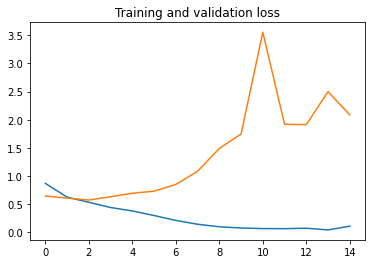

In [107]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the cat vs. dog classification model.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [111]:
os.getpid()

26302